<a href="https://colab.research.google.com/github/jessy-suresh/PRACTICE-QUESTIONS-MACHINE-LEARNING/blob/main/dataset_summary_and_statistics_expt_q_no_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🚀 DEMONSTRATING DATASET SUMMARY WITH SAMPLE DATA
✅ Dataset loaded successfully: (1000, 7)
📊 COMPREHENSIVE DATASET SUMMARY REPORT

📈 BASIC INFORMATION
   • Shape: (1000, 7) (rows, columns)
   • Memory Usage: 0.13 MB
   • Total Columns: 7
   • Total Rows: 1,000
   • Duplicate Rows: 0
   • Data Types: {dtype('float64'): 3, dtype('O'): 2, dtype('bool'): 1, dtype('int64'): 1}

🔍 DATA QUALITY METRICS
   • Missing Values: 79 (1.13%)
   • Completeness Score: 98.87%
   • Columns with Missing Values: 2
   • Constant Features: 0
   • High Cardinality Features: 3

📋 COLUMN TYPE SUMMARY
   • Numerical Columns: 4
   • Categorical Columns: 2

🔢 NUMERICAL COLUMNS SUMMARY
             mean        std       min        50%         max  skewness
age        37.508     18.795     2.587     35.587     150.000     4.215
income  51102.040  20042.295 -8807.773  50872.049  113862.151    -0.039
score      75.024     14.681    30.133     74.881     133.894     0.088
rating      2.973      1.419     1.000      3.00

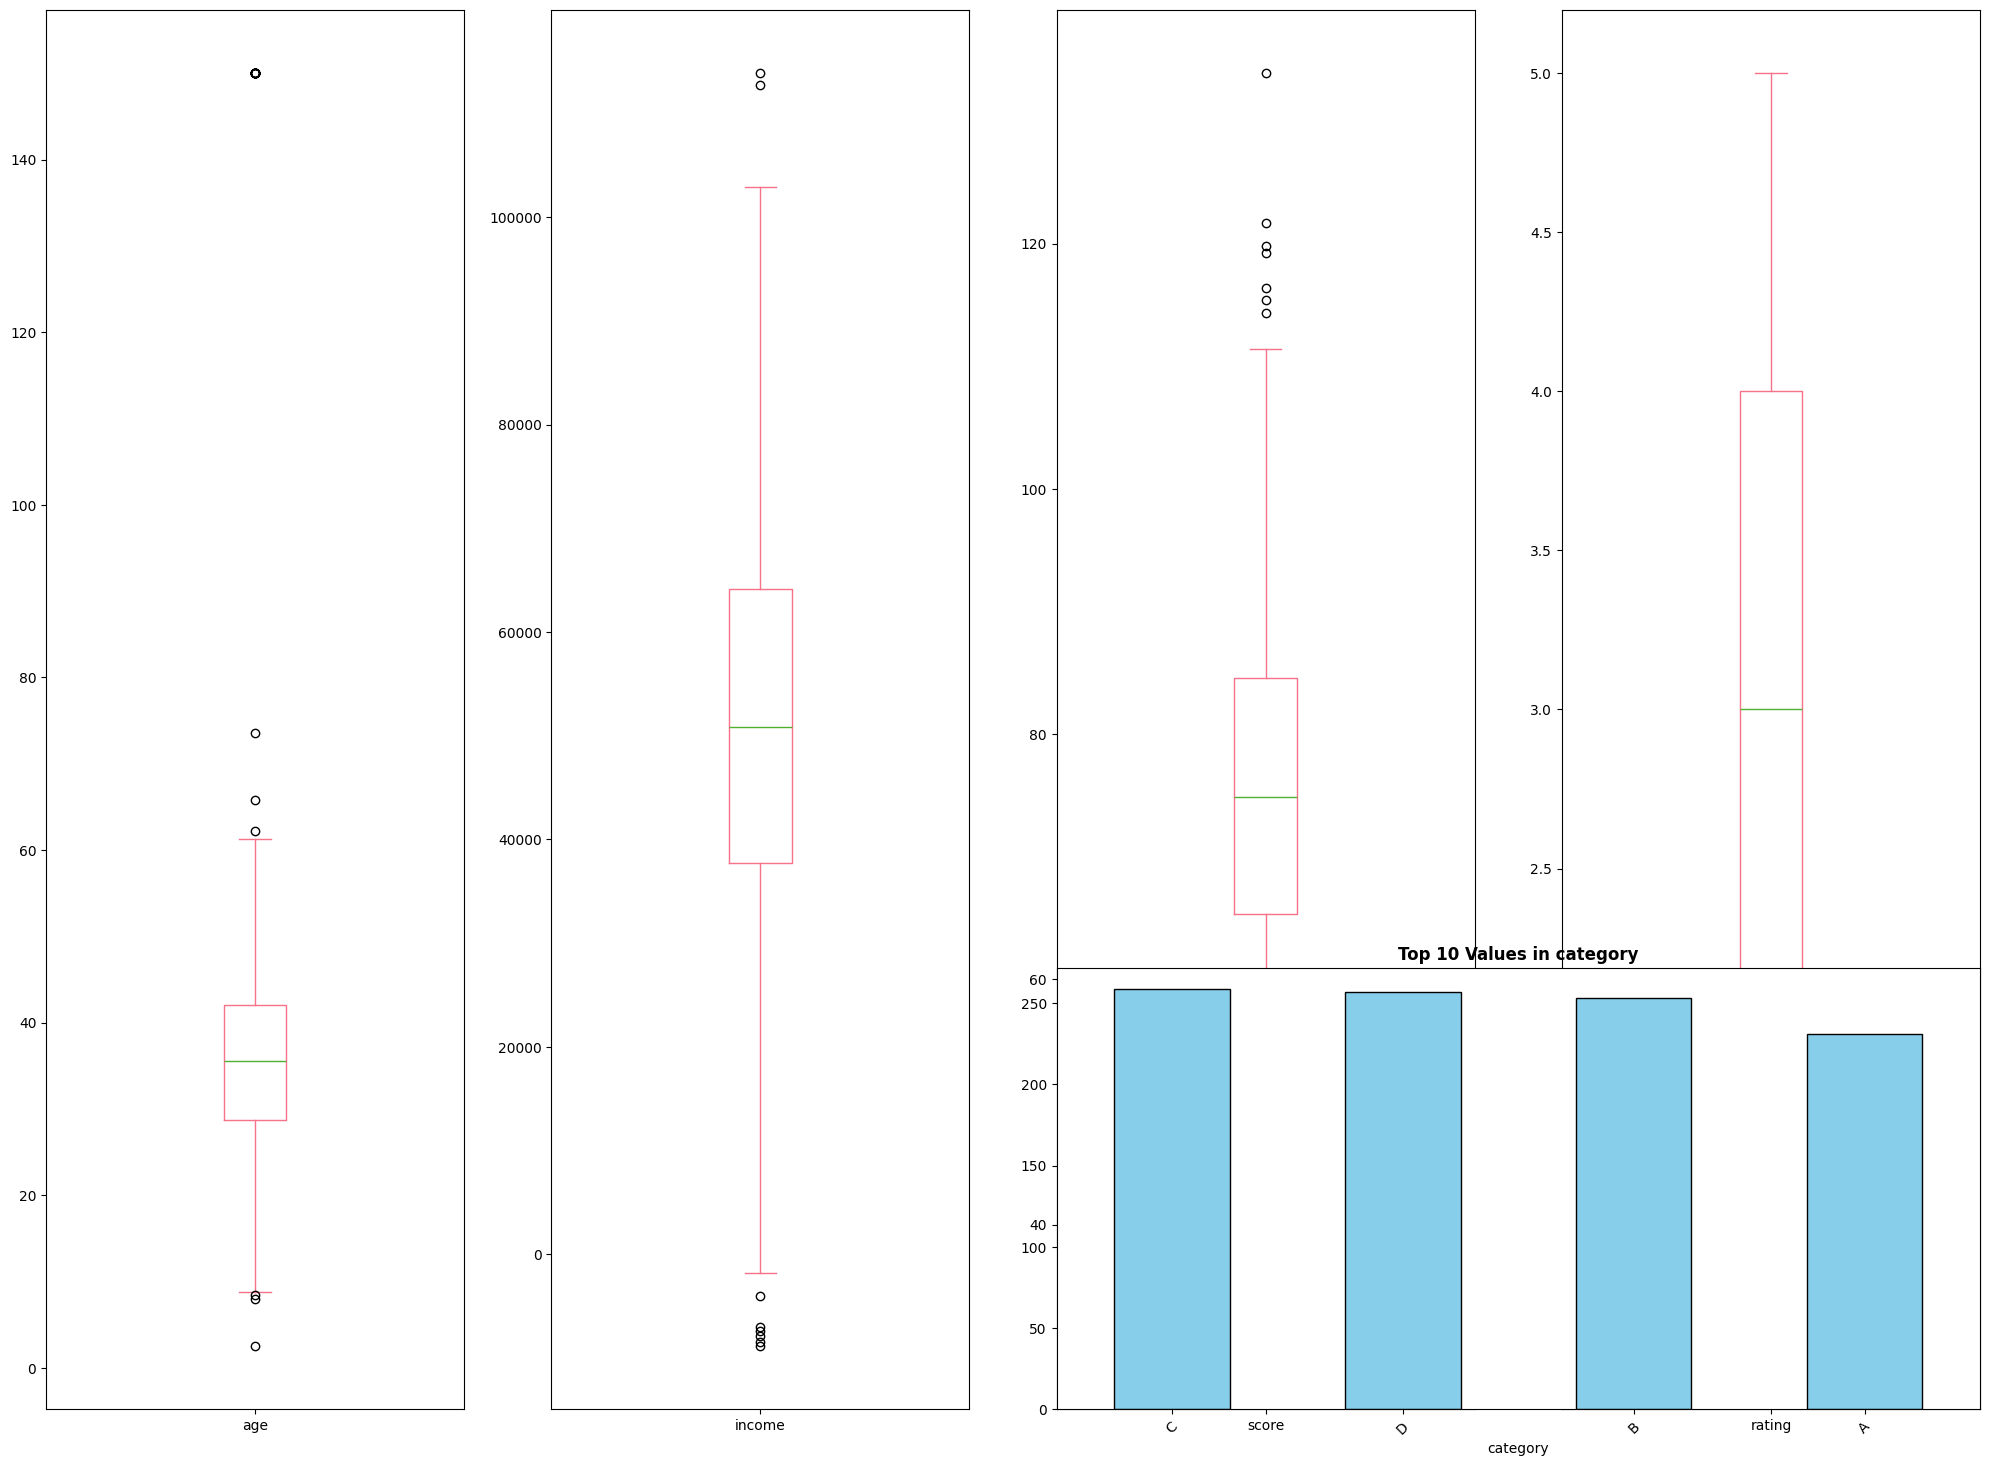

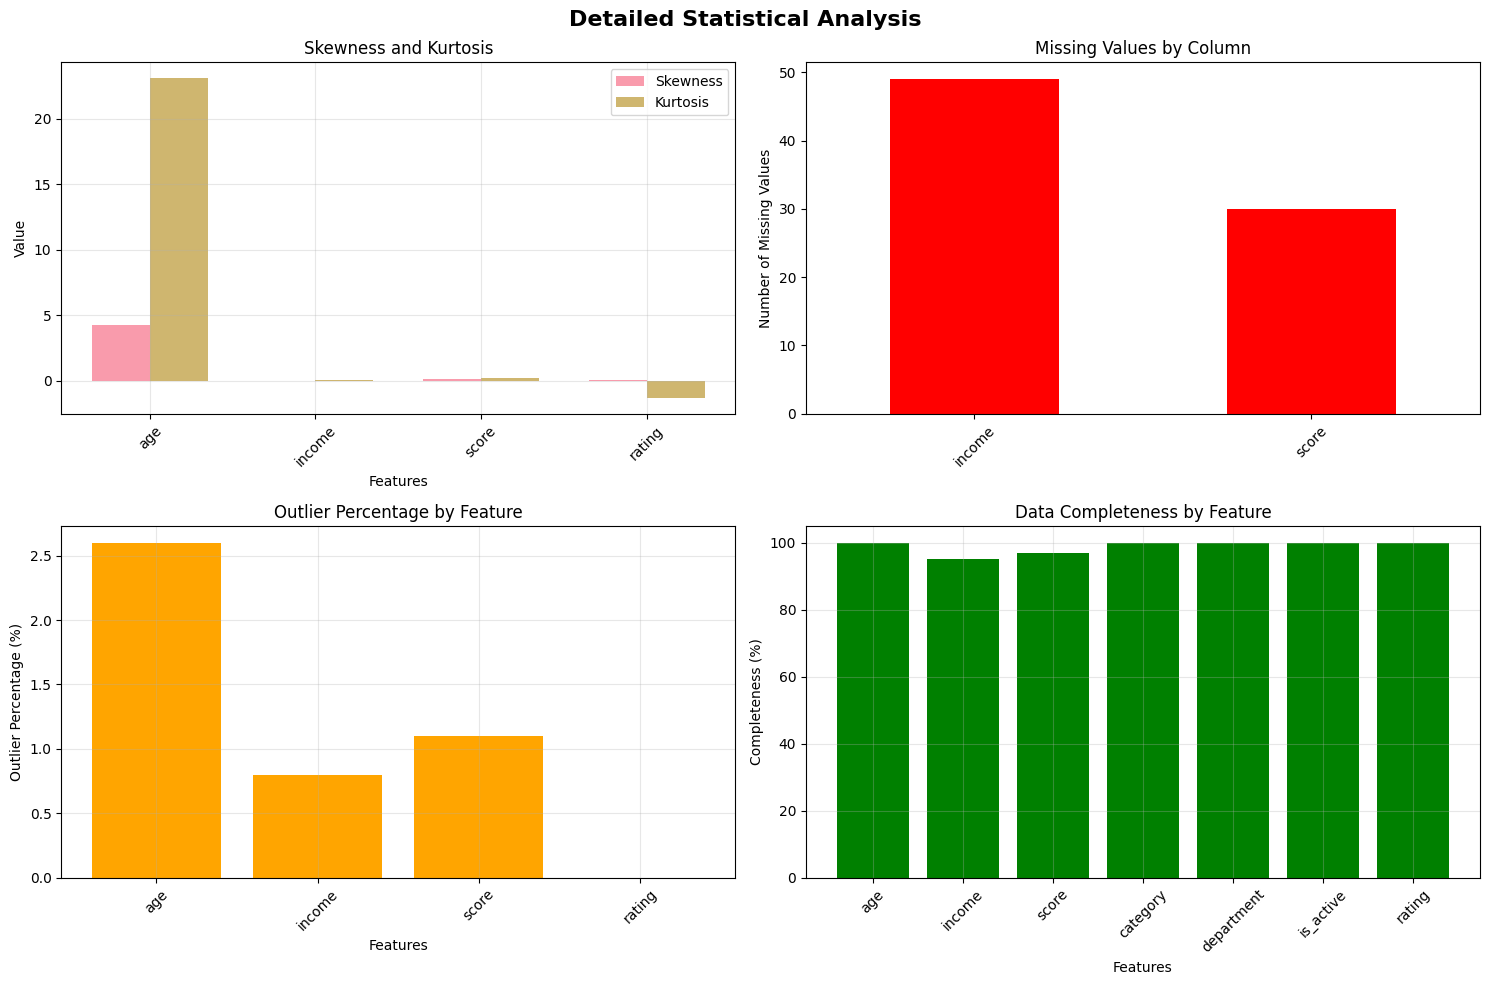

✅ Summary exported to sample_dataset_summary.txt


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

class DatasetSummary:
    """Comprehensive dataset summary and statistics analyzer"""

    def __init__(self, dataset=None):
        self.dataset = dataset
        self.df = None
        self.summary_stats = {}

    def load_data(self, data):
        """Load data from various sources"""
        if isinstance(data, pd.DataFrame):
            self.df = data
        elif isinstance(data, str):
            # Try to load from file
            try:
                if data.endswith('.csv'):
                    self.df = pd.read_csv(data)
                elif data.endswith(('.xlsx', '.xls')):
                    self.df = pd.read_excel(data)
                else:
                    print("Unsupported file format")
                    return False
            except Exception as e:
                print(f"Error loading file: {e}")
                return False
        else:
            print("Unsupported data type")
            return False

        print(f"✅ Dataset loaded successfully: {self.df.shape}")
        return True

    def generate_comprehensive_summary(self):
        """Generate comprehensive dataset summary"""
        if self.df is None:
            print("❌ No dataset loaded")
            return

        self._calculate_basic_info()
        self._calculate_detailed_statistics()
        self._calculate_data_quality_metrics()

        self._display_summary_report()
        self._create_visual_summary()

    def _calculate_basic_info(self):
        """Calculate basic dataset information"""
        self.summary_stats['basic_info'] = {
            'shape': self.df.shape,
            'memory_usage_mb': self.df.memory_usage(deep=True).sum() / 1024**2,
            'total_columns': len(self.df.columns),
            'total_rows': len(self.df),
            'duplicate_rows': self.df.duplicated().sum(),
            'data_types': self.df.dtypes.value_counts().to_dict()
        }

    def _calculate_detailed_statistics(self):
        """Calculate detailed statistics for numerical and categorical columns"""
        numerical_cols = self.df.select_dtypes(include=[np.number]).columns
        categorical_cols = self.df.select_dtypes(include=['object', 'category']).columns

        # Numerical columns statistics
        num_stats = {}
        for col in numerical_cols:
            num_stats[col] = {
                'count': self.df[col].count(),
                'mean': self.df[col].mean(),
                'std': self.df[col].std(),
                'min': self.df[col].min(),
                '25%': self.df[col].quantile(0.25),
                '50%': self.df[col].median(),
                '75%': self.df[col].quantile(0.75),
                'max': self.df[col].max(),
                'skewness': self.df[col].skew(),
                'kurtosis': self.df[col].kurtosis(),
                'variance': self.df[col].var(),
                'range': self.df[col].max() - self.df[col].min(),
                'cv': (self.df[col].std() / self.df[col].mean()) if self.df[col].mean() != 0 else np.nan,
                'zeros': (self.df[col] == 0).sum(),
                'negatives': (self.df[col] < 0).sum()
            }

        # Categorical columns statistics
        cat_stats = {}
        for col in categorical_cols:
            value_counts = self.df[col].value_counts()
            cat_stats[col] = {
                'count': self.df[col].count(),
                'unique': self.df[col].nunique(),
                'top': value_counts.index[0] if len(value_counts) > 0 else None,
                'freq': value_counts.iloc[0] if len(value_counts) > 0 else 0,
                'entropy': stats.entropy(value_counts),
                'missing': self.df[col].isnull().sum()
            }

        self.summary_stats['numerical'] = num_stats
        self.summary_stats['categorical'] = cat_stats

    def _calculate_data_quality_metrics(self):
        """Calculate data quality metrics"""
        total_cells = self.df.shape[0] * self.df.shape[1]
        missing_total = self.df.isnull().sum().sum()

        self.summary_stats['quality'] = {
            'missing_total': missing_total,
            'missing_percentage': (missing_total / total_cells) * 100,
            'completeness_score': ((total_cells - missing_total) / total_cells) * 100,
            'columns_with_missing': (self.df.isnull().sum() > 0).sum(),
            'high_cardinality_features': [col for col in self.df.columns
                                        if self.df[col].nunique() > 100],
            'constant_features': [col for col in self.df.columns
                                if self.df[col].nunique() == 1]
        }

        # Outlier detection using IQR method
        numerical_cols = self.df.select_dtypes(include=[np.number]).columns
        outlier_info = {}
        for col in numerical_cols:
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = self.df[(self.df[col] < lower_bound) | (self.df[col] > upper_bound)]
            outlier_info[col] = {
                'count': len(outliers),
                'percentage': (len(outliers) / len(self.df)) * 100,
                'bounds': [lower_bound, upper_bound]
            }

        self.summary_stats['outliers'] = outlier_info

    def _display_summary_report(self):
        """Display comprehensive summary report"""
        print("=" * 80)
        print("📊 COMPREHENSIVE DATASET SUMMARY REPORT")
        print("=" * 80)

        # Basic Information
        basic = self.summary_stats['basic_info']
        print(f"\n📈 BASIC INFORMATION")
        print(f"   • Shape: {basic['shape']} (rows, columns)")
        print(f"   • Memory Usage: {basic['memory_usage_mb']:.2f} MB")
        print(f"   • Total Columns: {basic['total_columns']}")
        print(f"   • Total Rows: {basic['total_rows']:,}")
        print(f"   • Duplicate Rows: {basic['duplicate_rows']}")
        print(f"   • Data Types: {basic['data_types']}")

        # Data Quality
        quality = self.summary_stats['quality']
        print(f"\n🔍 DATA QUALITY METRICS")
        print(f"   • Missing Values: {quality['missing_total']} ({quality['missing_percentage']:.2f}%)")
        print(f"   • Completeness Score: {quality['completeness_score']:.2f}%")
        print(f"   • Columns with Missing Values: {quality['columns_with_missing']}")
        print(f"   • Constant Features: {len(quality['constant_features'])}")
        print(f"   • High Cardinality Features: {len(quality['high_cardinality_features'])}")

        # Column Type Summary
        num_cols = len(self.summary_stats['numerical'])
        cat_cols = len(self.summary_stats['categorical'])
        print(f"\n📋 COLUMN TYPE SUMMARY")
        print(f"   • Numerical Columns: {num_cols}")
        print(f"   • Categorical Columns: {cat_cols}")

        # Numerical Statistics Summary
        if num_cols > 0:
            print(f"\n🔢 NUMERICAL COLUMNS SUMMARY")
            num_df = pd.DataFrame(self.summary_stats['numerical']).T
            print(num_df[['mean', 'std', 'min', '50%', 'max', 'skewness']].round(3))

        # Categorical Statistics Summary
        if cat_cols > 0:
            print(f"\n📝 CATEGORICAL COLUMNS SUMMARY")
            for col, stats in self.summary_stats['categorical'].items():
                print(f"   • {col}: {stats['unique']} unique values, "
                      f"most frequent: '{stats['top']}' ({stats['freq']} times)")

        # Outlier Summary
        if self.summary_stats['outliers']:
            print(f"\n⚠️  OUTLIER SUMMARY (IQR Method)")
            for col, info in self.summary_stats['outliers'].items():
                if info['count'] > 0:
                    print(f"   • {col}: {info['count']} outliers ({info['percentage']:.1f}%)")

    def _create_visual_summary(self):
        """Create comprehensive visual summary"""
        if self.df is None:
            return

        print(f"\n📊 GENERATING VISUAL SUMMARY...")

        # Set up the plotting style
        plt.style.use('default')
        sns.set_palette("husl")
        fig = plt.figure(figsize=(20, 15))

        # 1. Data Types Distribution
        ax1 = plt.subplot2grid((3, 4), (0, 0))
        dtype_counts = self.df.dtypes.value_counts()
        dtype_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax1)
        ax1.set_title('Data Types Distribution', fontsize=12, fontweight='bold')

        # 2. Missing Values Heatmap
        ax2 = plt.subplot2grid((3, 4), (0, 1))
        if self.df.isnull().sum().sum() > 0:
            sns.heatmap(self.df.isnull(), cbar=True, yticklabels=False, ax=ax2)
            ax2.set_title('Missing Values Heatmap', fontsize=12, fontweight='bold')
        else:
            ax2.text(0.5, 0.5, 'No Missing Values', ha='center', va='center',
                    transform=ax2.transAxes, fontsize=14)
            ax2.set_title('Missing Values Heatmap', fontsize=12, fontweight='bold')

        # 3. Correlation Heatmap (if numerical columns exist)
        numerical_cols = self.df.select_dtypes(include=[np.number]).columns
        if len(numerical_cols) > 1:
            ax3 = plt.subplot2grid((3, 4), (0, 2), colspan=2)
            correlation_matrix = self.df[numerical_cols].corr()
            sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                       center=0, ax=ax3, cbar_kws={'shrink': 0.8})
            ax3.set_title('Correlation Heatmap', fontsize=12, fontweight='bold')

        # 4. Distribution of Numerical Features
        if len(numerical_cols) > 0:
            ax4 = plt.subplot2grid((3, 4), (1, 0), colspan=4)
            # Plot first 6 numerical columns
            cols_to_plot = numerical_cols[:min(6, len(numerical_cols))]
            self.df[cols_to_plot].hist(bins=20, ax=ax4,
                                     layout=(1, len(cols_to_plot)),
                                     edgecolor='black')
            ax4.set_title('Distribution of Numerical Features', fontsize=12, fontweight='bold')

        # 5. Box Plots for Numerical Features
        if len(numerical_cols) > 0:
            ax5 = plt.subplot2grid((3, 4), (2, 0), colspan=2)
            # Plot first 4 numerical columns
            cols_to_plot = numerical_cols[:min(4, len(numerical_cols))]
            self.df[cols_to_plot].plot(kind='box', ax=ax5, subplots=True,
                                     layout=(1, len(cols_to_plot)))
            ax5.set_title('Box Plots - Outlier Detection', fontsize=12, fontweight='bold')

        # 6. Categorical Features (if exist)
        categorical_cols = self.df.select_dtypes(include=['object', 'category']).columns
        if len(categorical_cols) > 0:
            ax6 = plt.subplot2grid((3, 4), (2, 2), colspan=2)
            # Plot first categorical column
            first_cat_col = categorical_cols[0]
            value_counts = self.df[first_cat_col].value_counts().head(10)
            value_counts.plot(kind='bar', ax=ax6, color='skyblue', edgecolor='black')
            ax6.set_title(f'Top 10 Values in {first_cat_col}', fontsize=12, fontweight='bold')
            ax6.tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()

        # Additional detailed plots
        self._create_detailed_plots()

    def _create_detailed_plots(self):
        """Create additional detailed plots"""
        numerical_cols = self.df.select_dtypes(include=[np.number]).columns

        if len(numerical_cols) == 0:
            return

        # Create detailed statistics figure
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('Detailed Statistical Analysis', fontsize=16, fontweight='bold')

        # 1. Skewness and Kurtosis
        if len(numerical_cols) > 0:
            skewness = [self.df[col].skew() for col in numerical_cols]
            kurtosis = [self.df[col].kurtosis() for col in numerical_cols]

            x_pos = np.arange(len(numerical_cols))
            width = 0.35

            axes[0,0].bar(x_pos - width/2, skewness, width, label='Skewness', alpha=0.7)
            axes[0,0].bar(x_pos + width/2, kurtosis, width, label='Kurtosis', alpha=0.7)
            axes[0,0].set_xlabel('Features')
            axes[0,0].set_ylabel('Value')
            axes[0,0].set_title('Skewness and Kurtosis')
            axes[0,0].set_xticks(x_pos)
            axes[0,0].set_xticklabels([col[:10] + '...' if len(col) > 10 else col
                                     for col in numerical_cols], rotation=45)
            axes[0,0].legend()
            axes[0,0].grid(True, alpha=0.3)

        # 2. Missing values by column
        missing_by_col = self.df.isnull().sum()
        if missing_by_col.sum() > 0:
            missing_by_col[missing_by_col > 0].plot(kind='bar', ax=axes[0,1], color='red')
            axes[0,1].set_title('Missing Values by Column')
            axes[0,1].set_ylabel('Number of Missing Values')
            axes[0,1].tick_params(axis='x', rotation=45)
        else:
            axes[0,1].text(0.5, 0.5, 'No Missing Values', ha='center', va='center',
                          transform=axes[0,1].transAxes, fontsize=14)
            axes[0,1].set_title('Missing Values by Column')

        # 3. Outlier percentage
        outlier_percentages = [info['percentage'] for info in self.summary_stats['outliers'].values()]
        if len(outlier_percentages) > 0:
            axes[1,0].bar(range(len(outlier_percentages)), outlier_percentages, color='orange')
            axes[1,0].set_xlabel('Features')
            axes[1,0].set_ylabel('Outlier Percentage (%)')
            axes[1,0].set_title('Outlier Percentage by Feature')
            axes[1,0].set_xticks(range(len(outlier_percentages)))
            axes[1,0].set_xticklabels([col[:10] + '...' if len(col) > 10 else col
                                     for col in numerical_cols], rotation=45)
            axes[1,0].grid(True, alpha=0.3)

        # 4. Data completeness
        completeness = [(1 - self.df[col].isnull().sum() / len(self.df)) * 100
                       for col in self.df.columns]
        axes[1,1].bar(range(len(completeness)), completeness, color='green')
        axes[1,1].set_xlabel('Features')
        axes[1,1].set_ylabel('Completeness (%)')
        axes[1,1].set_title('Data Completeness by Feature')
        axes[1,1].set_xticks(range(len(completeness)))
        axes[1,1].set_xticklabels([col[:10] + '...' if len(col) > 10 else col
                                 for col in self.df.columns], rotation=45)
        axes[1,1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def export_summary(self, filename='dataset_summary.txt'):
        """Export summary to text file"""
        with open(filename, 'w') as f:
            f.write("DATASET SUMMARY REPORT\n")
            f.write("=" * 50 + "\n\n")

            # Basic info
            basic = self.summary_stats['basic_info']
            f.write("BASIC INFORMATION:\n")
            f.write(f"Shape: {basic['shape']}\n")
            f.write(f"Memory Usage: {basic['memory_usage_mb']:.2f} MB\n")
            f.write(f"Total Rows: {basic['total_rows']:,}\n")
            f.write(f"Total Columns: {basic['total_columns']}\n")
            f.write(f"Duplicate Rows: {basic['duplicate_rows']}\n\n")

            # Data quality
            quality = self.summary_stats['quality']
            f.write("DATA QUALITY:\n")
            f.write(f"Missing Values: {quality['missing_total']} ({quality['missing_percentage']:.2f}%)\n")
            f.write(f"Completeness Score: {quality['completeness_score']:.2f}%\n\n")

            # Numerical statistics
            if self.summary_stats['numerical']:
                f.write("NUMERICAL STATISTICS:\n")
                for col, stats in self.summary_stats['numerical'].items():
                    f.write(f"{col}:\n")
                    f.write(f"  Mean: {stats['mean']:.3f}, Std: {stats['std']:.3f}\n")
                    f.write(f"  Min: {stats['min']:.3f}, Max: {stats['max']:.3f}\n")
                    f.write(f"  Skewness: {stats['skewness']:.3f}\n\n")

        print(f"✅ Summary exported to {filename}")

# Example usage and demonstration
def demonstrate_with_sample_data():
    """Demonstrate the DatasetSummary class with sample data"""

    # Create sample dataset
    np.random.seed(42)
    n_samples = 1000

    sample_data = {
        'age': np.random.normal(35, 10, n_samples),
        'income': np.random.normal(50000, 20000, n_samples),
        'score': np.random.normal(75, 15, n_samples),
        'category': np.random.choice(['A', 'B', 'C', 'D'], n_samples),
        'department': np.random.choice(['Sales', 'Marketing', 'IT', 'HR'], n_samples),
        'is_active': np.random.choice([True, False], n_samples),
        'rating': np.random.randint(1, 6, n_samples)
    }

    # Introduce some missing values and outliers
    df = pd.DataFrame(sample_data)
    df.loc[np.random.choice(n_samples, 50), 'income'] = np.nan
    df.loc[np.random.choice(n_samples, 30), 'score'] = np.nan
    df.loc[np.random.choice(n_samples, 20), 'age'] = 150  # Outlier

    print("🚀 DEMONSTRATING DATASET SUMMARY WITH SAMPLE DATA")
    print("=" * 60)

    # Create analyzer and generate summary
    analyzer = DatasetSummary()
    analyzer.load_data(df)
    analyzer.generate_comprehensive_summary()

    # Export summary
    analyzer.export_summary('sample_dataset_summary.txt')

    return analyzer

# Run demonstration
if __name__ == "__main__":
    analyzer = demonstrate_with_sample_data()

In [2]:
def analyze_existing_dataset(data_source):
    """Quick analysis for existing datasets"""

    analyzer = DatasetSummary()

    if analyzer.load_data(data_source):
        analyzer.generate_comprehensive_summary()
        analyzer.export_summary()
    else:
        print("❌ Failed to load dataset")

# Example usage:
# analyze_existing_dataset('your_dataset.csv')
# analyze_existing_dataset(your_dataframe)

🚀 STARTING DATASET SUMMARY ANALYSIS...
🚀 DEMONSTRATING DATASET SUMMARY WITH SAMPLE DATA
✅ Dataset loaded successfully: (1000, 7)
📊 COMPREHENSIVE DATASET SUMMARY REPORT

📈 BASIC INFORMATION
   • Shape: (1000, 7) (rows, columns)
   • Memory Usage: 0.13 MB
   • Total Columns: 7
   • Total Rows: 1,000
   • Duplicate Rows: 0
   • Data Types: {dtype('float64'): 3, dtype('O'): 2, dtype('bool'): 1, dtype('int64'): 1}

🔍 DATA QUALITY METRICS
   • Missing Values: 79 (1.13%)
   • Completeness Score: 98.87%
   • Columns with Missing Values: 2
   • Constant Features: 0
   • High Cardinality Features: 3

📋 COLUMN TYPE SUMMARY
   • Numerical Columns: 4
   • Categorical Columns: 2

🔢 NUMERICAL COLUMNS SUMMARY
             mean        std       min        50%         max  skewness
age        37.508     18.795     2.587     35.587     150.000     4.215
income  51102.040  20042.295 -8807.773  50872.049  113862.151    -0.039
score      75.024     14.681    30.133     74.881     133.894     0.088
rating   

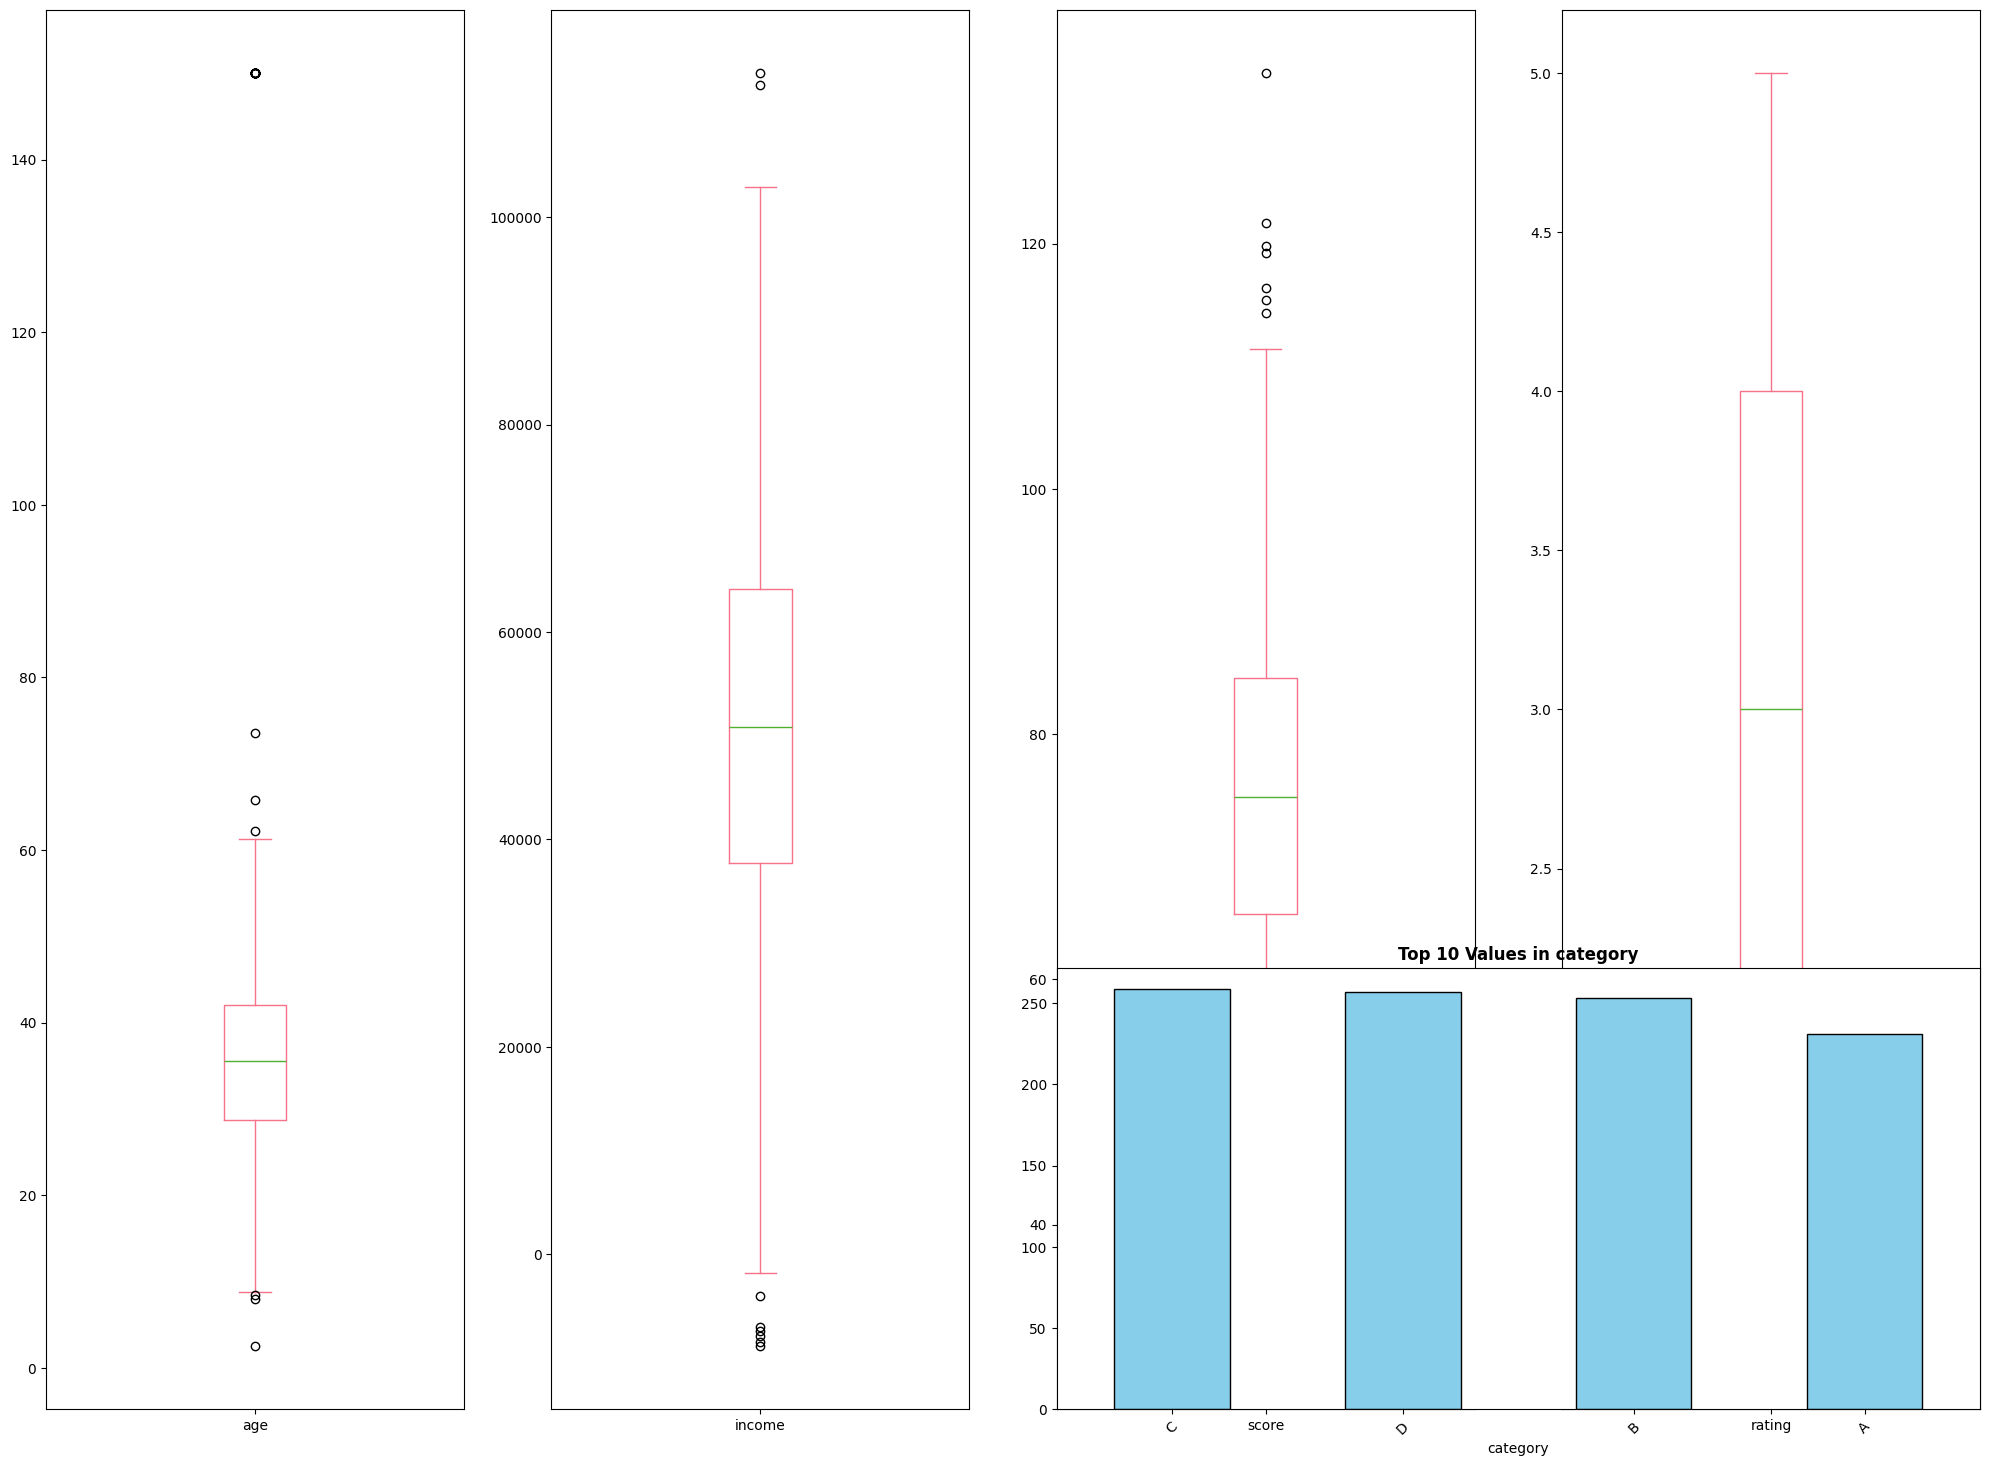

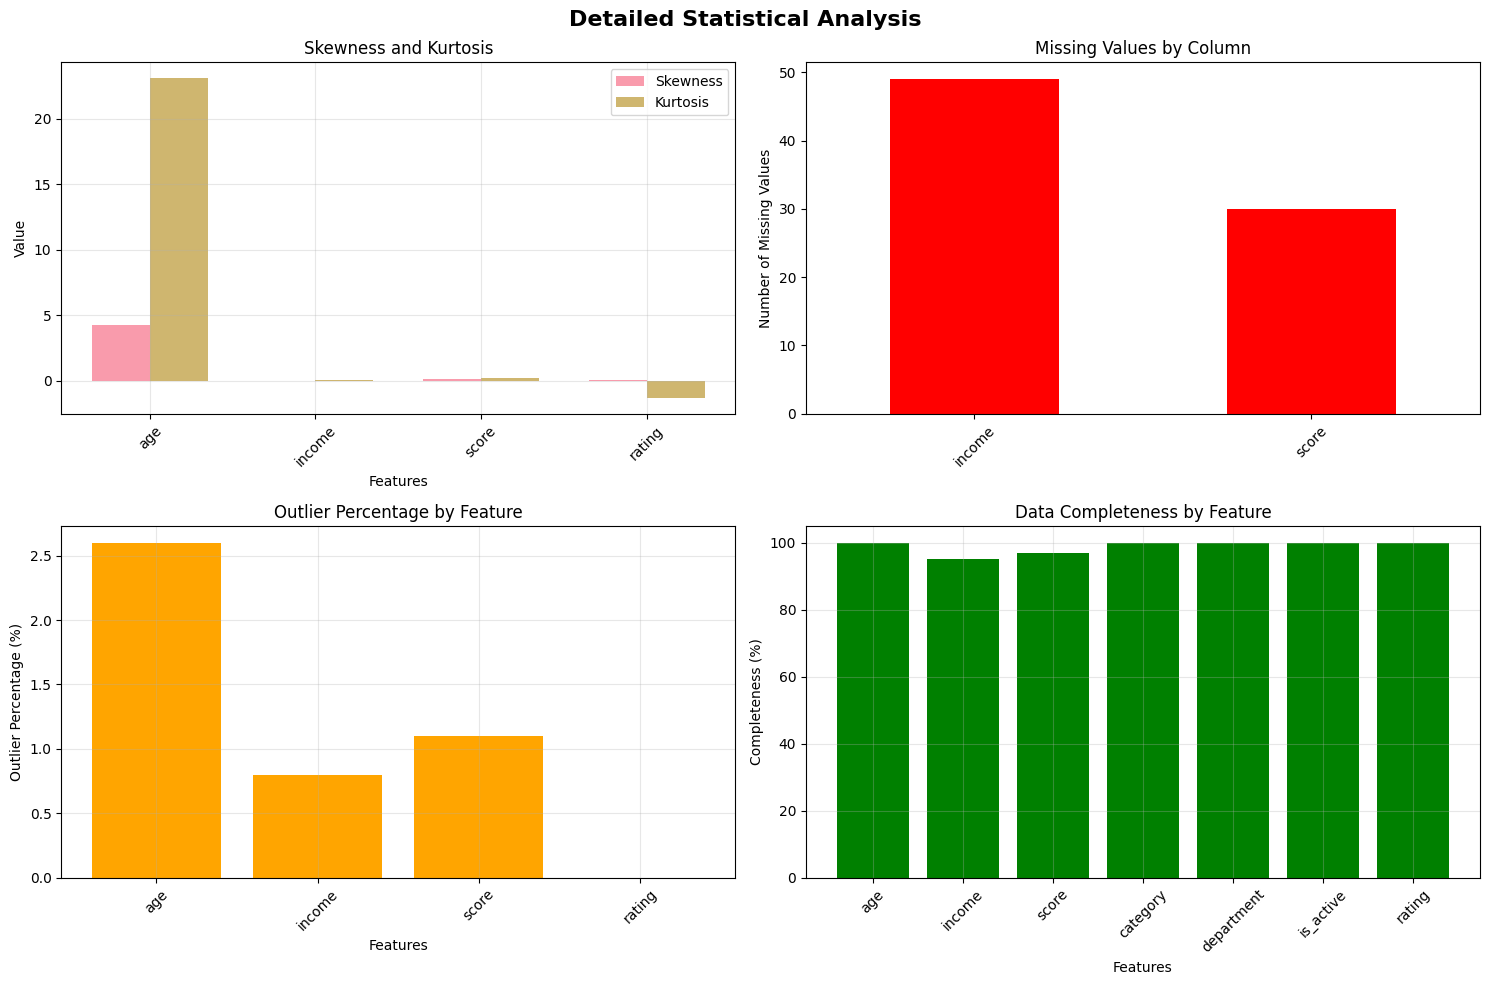

✅ Summary exported to sample_dataset_summary.txt

🎯 ADVANCED STATISTICAL REPORT

📊 NORMALITY TESTS (Shapiro-Wilk):
  age: p-value = 0.0000 (Non-Normal)
  income: p-value = 0.7875 (Normal)
  score: p-value = 0.6002 (Normal)
  rating: p-value = 0.0000 (Non-Normal)

📈 CORRELATION SIGNIFICANCE:


In [3]:
def generate_advanced_statistical_report(df):
    """Generate advanced statistical report"""

    print("🎯 ADVANCED STATISTICAL REPORT")
    print("=" * 50)

    # Normality tests for numerical columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns

    if len(numerical_cols) > 0:
        print("\n📊 NORMALITY TESTS (Shapiro-Wilk):")
        for col in numerical_cols:
            if len(df[col].dropna()) > 3:  # Shapiro-Wilk requires at least 3 samples
                stat, p_value = stats.shapiro(df[col].dropna())
                normality = "Normal" if p_value > 0.05 else "Non-Normal"
                print(f"  {col}: p-value = {p_value:.4f} ({normality})")

    # Correlation significance
    if len(numerical_cols) > 1:
        print("\n📈 CORRELATION SIGNIFICANCE:")
        corr_matrix = df[numerical_cols].corr()
        for i in range(len(numerical_cols)):
            for j in range(i+1, len(numerical_cols)):
                col1, col2 = numerical_cols[i], numerical_cols[j]
                corr_value = corr_matrix.loc[col1, col2]
                if abs(corr_value) > 0.3:  # Only show significant correlations
                    print(f"  {col1} vs {col2}: r = {corr_value:.3f}")

# Run the demonstration
print("🚀 STARTING DATASET SUMMARY ANALYSIS...")
analyzer = demonstrate_with_sample_data()

# Generate advanced report
print("\n" + "="*60)
generate_advanced_statistical_report(analyzer.df)